# Week 2 Assignment : Quantum circuits
Author : Anupama Ray, Research Scientist & IBM Quantum Technical Ambassador, IBM Research India

 We will learn to implement Basic circuits and Quantum concepts learnt in Week 1 and Week 2 of the course in this notebook. First lets import all the required libraries

In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [3]:
from qiskit import assemble, execute
import matplotlib.pyplot as plt


# Question 4
Create a Quantum Circuit acting on a quantum register of three qubits, set the first qubit to superposition and entangle with the other qubits. 
You need to complete the function in the cell below to Create the above mentioned entangled state. 
 This Function should take a circuit object 'ckt', and an integer 'n' : The number of data qubits 
 

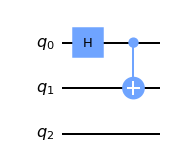

In [52]:
circ = QuantumCircuit(3)
#def create_entangledstate_function(circ):
circ.h(0)
circ.cx(0, 1)
#circ.cx(0, 2)
circ.draw('mpl')
#circ = create_entangledstate_function(circ)

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to statevector_simulator.

In [53]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution
job = backend.run(circ)
result = job.result()


# Question 1.1
What is the the state vector for the quantum circuit? 

In [54]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]


# Question 1.2
use the visualization function to plot the real and imaginary components of the state density matrix ρ.

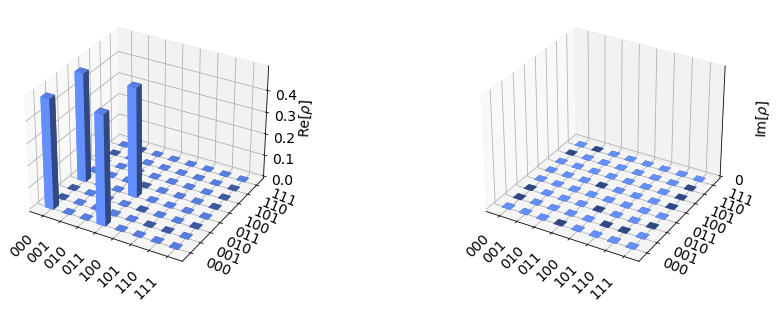

In [55]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Lets create a helper function that we can use multiple times. This function will execute a circuit on the state vector simulator and return state vector results, circuit diagram and Qsphere.

In [5]:
# Will execute the circuit on the state vector (sv) simulator
# Returns state vector results, circuit diagram, and QSphere 
def execute_circuit_sv(quantum_circuit):
    #Create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')
    #Execute the circuit on the simulator
    result = execute(quantum_circuit, statevector_simulator).result()
    #Assign state vector results
    statevector_results  = result.get_statevector(quantum_circuit)
    #Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw()
    #Draw the Qsphere 
    q_sphere = plot_state_qsphere(statevector_results)
    #Return the results, circuit diagram, and QSphere		
    return statevector_results, circuit_diagram, q_sphere

In [36]:
execute_circuit_sv(circ)

(array([ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, -0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j]),
 <Figure size 267.197x204.68 with 1 Axes>,
 <Figure size 504x504 with 2 Axes>)

#Question 2
Demonstrating Phase flip - ability to negate a state vector (add an X gate before H and Z gates)

premise:
Working with Phase gate (Pauli Z gate) which rotates along the longitude of the Hilbert space, hence the phase of the Hilbert space. So lets first create a circuit for Z gate

In [19]:
#single qubit circuit creation
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0) #set qubit to superposition
qc.z(0) #add Z gate to rotate out of phase by pi/2
#execute circuit and capture results
result, img, qsphere = execute_circuit_sv(qc)

In [20]:
result

array([7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j])

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


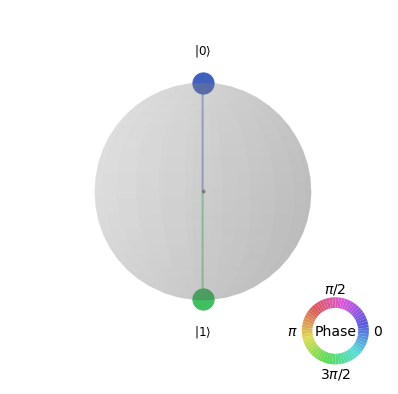

In [21]:
qsphere

So Z gate provides a way to perform a phase shift on a qubit causing the state of the qubit to change its sign from psoitive to negative.
If x gate is used then the state result becomes negative. This ability to negate a state vector is called Phase flip.

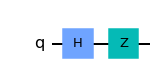

In [12]:
img

# References 

1. I. Chuang & M. Nielsen, "Quantum Computation and Quantum Information", Cambridge: Cambridge University Press, 2000.

2. Qiskit Textbook : https://qiskit.org/textbook/
